In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
import os
import json 
import unicodedata
import re
import random


import torch
from torch.jit import script, trace
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import csv
import random
import re
import os
import unicodedata
import codecs
from io import open
import itertools
import math
from Seq2Seq.CreatePairsandVoc import CreatePairs
from Seq2Seq.GetTrainData import GetTrainData
from Seq2Seq.Training import Training
import matplotlib.pyplot as plt
import numpy as np
USE_CUDA = torch.cuda.is_available()
device=torch.device('cpu')
device = torch.device("cuda" if USE_CUDA else "cpu")

In [2]:
DDIR='data'
corpus_f='friends-corpus'
corpuss='ConvAIandFriends'
utterancesPath='utterances.jsonl'
corpus_chatter='chatterbot'
Coca='coqa-train-v1.0.json'
convai=['data_volunteers.json','data_intermediate.json','data_tolokers.json']

In [3]:
cpv=CreatePairs(DDIR,corpus_f,utterancesPath,10,convai,corpus_chatter)

In [4]:
voc, pairs = cpv.load_data()

Starting
Number of pairs is 109623
After filters Number of pairs is 42394
Counted words: 8451


In [5]:
gtd=GetTrainData(voc)
small_batch_size = 5
batches = gtd.batch2TrainData([random.choice(pairs) for _ in range(small_batch_size)])
input_variable, lengths, target_variable, mask, max_target_len = batches

In [7]:
hidden_size=600
dropot=0.2
encoder_n_layer=2
decode_n_layer=2
batchesh_size=64
Train=Training(voc,device, hidden_size,encoder_n_layer, decode_n_layer, dropot, batch_size=64)

Building encoder and decoder ...
Models built and ready to go!


In [9]:
loadfilename=None
learning_rate = 0.0001
decoder_learning_ratio = 5.0
n_iteration = 20000
print_every = 100
save_every = 10000
clip = 50.0
teacher_forcing_ratio = 1.0

loss=Train.fit(corpuss, corpuss, voc, pairs, learning_rate, n_iteration,print_every, save_every, clip, corpuss, \
          loadfilename, teacher_forcing_ratio)

Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 100; Percent complete: 0.5%; Average loss: 4.9321
Iteration: 200; Percent complete: 1.0%; Average loss: 3.8985
Iteration: 300; Percent complete: 1.5%; Average loss: 3.5996
Iteration: 400; Percent complete: 2.0%; Average loss: 3.4082
Iteration: 500; Percent complete: 2.5%; Average loss: 3.2725
Iteration: 600; Percent complete: 3.0%; Average loss: 3.1491
Iteration: 700; Percent complete: 3.5%; Average loss: 3.0554
Iteration: 800; Percent complete: 4.0%; Average loss: 3.0369
Iteration: 900; Percent complete: 4.5%; Average loss: 2.9301
Iteration: 1000; Percent complete: 5.0%; Average loss: 2.8674
Iteration: 1100; Percent complete: 5.5%; Average loss: 2.8454
Iteration: 1200; Percent complete: 6.0%; Average loss: 2.7709
Iteration: 1300; Percent complete: 6.5%; Average loss: 2.7103
Iteration: 1400; Percent complete: 7.0%; Average loss: 2.7054
Iteration: 1500; Percent complete: 7.5%; Average loss: 2.6613
Iterati

Iteration: 13000; Percent complete: 65.0%; Average loss: 0.5283
Iteration: 13100; Percent complete: 65.5%; Average loss: 0.5267
Iteration: 13200; Percent complete: 66.0%; Average loss: 0.5177
Iteration: 13300; Percent complete: 66.5%; Average loss: 0.5203
Iteration: 13400; Percent complete: 67.0%; Average loss: 0.5086
Iteration: 13500; Percent complete: 67.5%; Average loss: 0.5142
Iteration: 13600; Percent complete: 68.0%; Average loss: 0.4937
Iteration: 13700; Percent complete: 68.5%; Average loss: 0.4967
Iteration: 13800; Percent complete: 69.0%; Average loss: 0.4811
Iteration: 13900; Percent complete: 69.5%; Average loss: 0.4809
Iteration: 14000; Percent complete: 70.0%; Average loss: 0.4689
Iteration: 14100; Percent complete: 70.5%; Average loss: 0.4685
Iteration: 14200; Percent complete: 71.0%; Average loss: 0.4735
Iteration: 14300; Percent complete: 71.5%; Average loss: 0.4704
Iteration: 14400; Percent complete: 72.0%; Average loss: 0.4638
Iteration: 14500; Percent complete: 72.5

Text(0, 0.5, 'Loss')

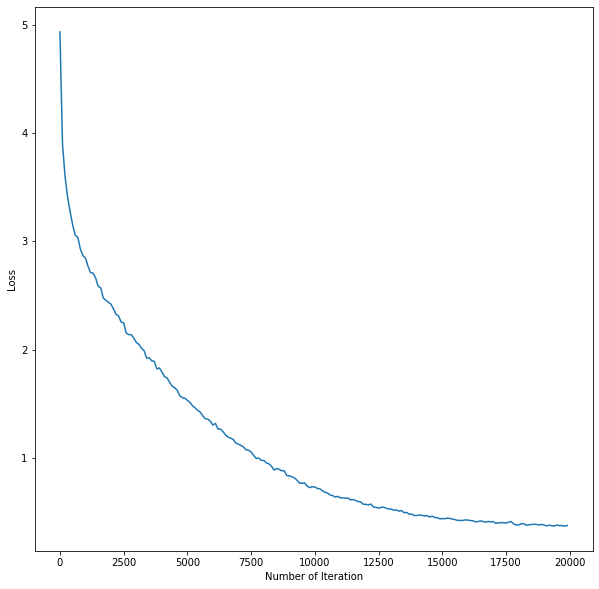

In [14]:
fig=plt.figure(figsize=(10,10))
plt.plot(np.arange(0, n_iteration,print_every), loss)
plt.xlabel('Number of Iteration')
plt.ylabel('Loss')